### Decision Tree
- *decision tree*: flowchart-like tree structure
    - *internal node*: denotes a test on an attribute
    - *branch*: outcome of the test
    - *leaf node* (terminal node) = class label
    - *pruning*: removing a sub-node from the tree (when main tree gets too big)
    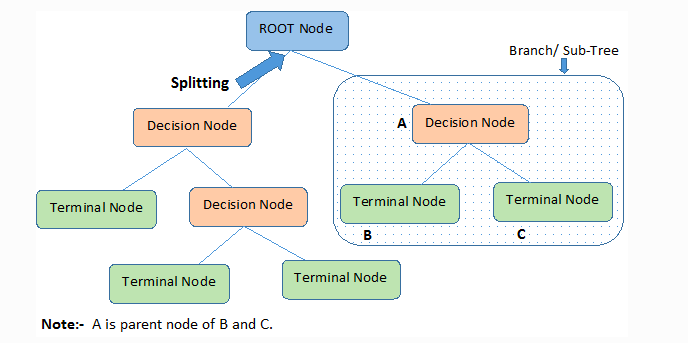

- choose features that can easily be classified/split into TWO groups/terminal nodes. -> this is PURE

#### Gini Impurity
- *gini impurity*: measures frequency at which any element of the dataset will be mislabelled when randomly labelled
    - pure datasets have features that can easily be split into two terminal nodes
    - calculated by 1- [ (probability of first group ^2) + (probability of second group^2) ]
    - ex, where one group has 3 and one group has 1, gini = 1- [ (3 / 4)^2 + (1 / 4)^2 ] = 6 / 16
- min. value = 0 -> this is a PURE node; all elements of the node are of ONE unique class (node will not be split again)
- goal is a *smaller* gini index
- applies to cases where the variable is positive to the target
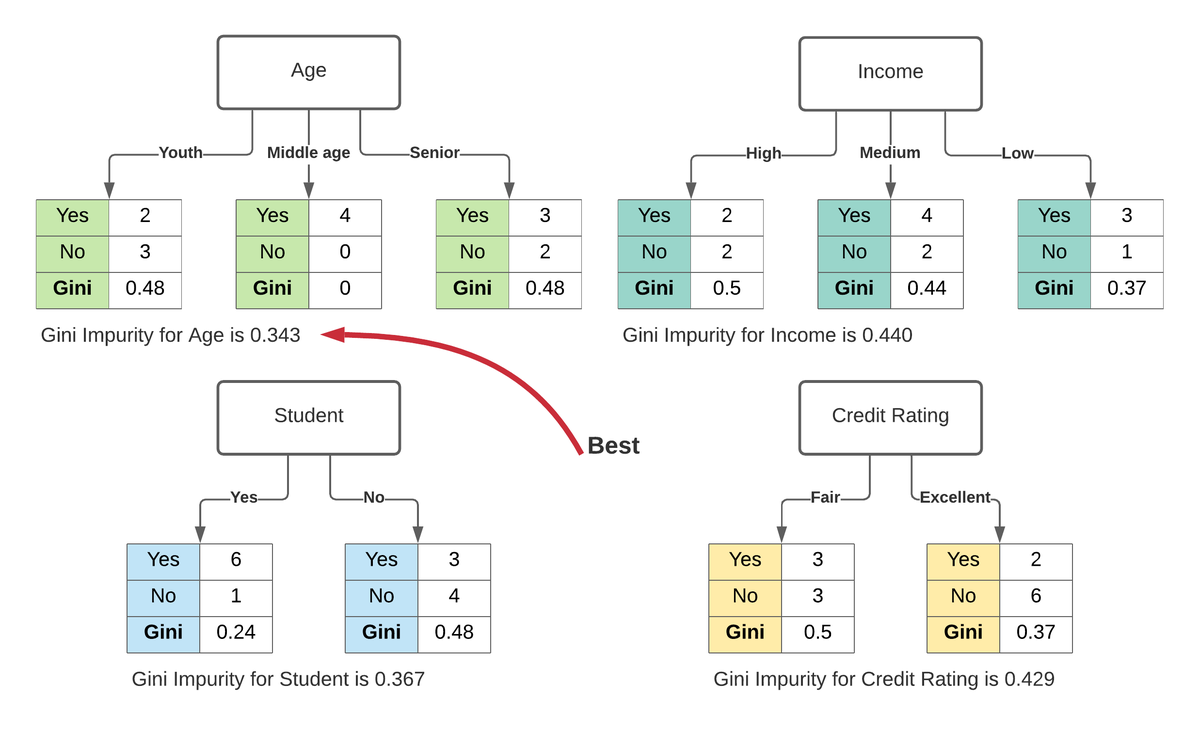

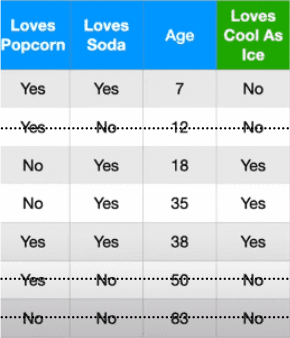
Calculate gini score for popcorn ->
- yes: 1 / 4 = 0.25 -> use this since it is smaller
- no: 3 / 4 = 0.75
*loves popcorn*
- 1 - [(1 / 4)^2 + (3 / 4)^2] = 0.375 * (4 / 7) 
- 1 - [( loves popcorn and ice / loves popcorn)^2 + (doesn't love ice / loves popcorn)^2] * (people in group / total)

*does not love popcorn*
- 1-[(2 / 3)^2 + (1 / 3)^2] * (3 / 7) = (some_num)
- 1- [( does not love popcorn and loves ice / does not love pop.)^2 + (does not love popcorn and not love ice / does not love pop.) ^2] 

*total*
- gini of the whole group = gini of yes + gini of no
- we will choose group with lower gini index

*for loves soda*
- those who love soda: 3 / 4
- those who loves soda and loves ice: 3 / 1
- those who do not loves soda, loves ice: 0 / 3
total gini: 4 / 7 ([1 - (3 / 4)^2 + (1 / 4)^2] + (3 / 7) * 0 = (4 / 7) * (6 / 16) = 0.2

#### Entropy
- *entropy*: measure of unpredictability in info being processed; higher = harder to draw conclusions
- *information gain*: 

*for the popcorn example, calculate entropy of loves soda*: - (3/7) log_2 (3/7) + (4/7)log_2

- gini score is max when the value is half and half (0.5) -> the condition is half and half (both conditions are represented)

In [13]:
# Load The Dataset
# Link: https://www.kaggle.com/madhansing/bank-loan2
import pandas as pd
import numpy as np
df = pd.read_csv('madfhantr.csv')
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df.shape

(614, 13)

In [15]:
df.dropna(inplace=True)
df = df.drop(['Loan_ID'], axis = 1)

# check the unique values of each column
for column in df:
    print(df[column].value_counts())

Male      394
Female     86
Name: Gender, dtype: int64
Yes    311
No     169
Name: Married, dtype: int64
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64
Graduate        383
Not Graduate     97
Name: Education, dtype: int64
No     414
Yes     66
Name: Self_Employed, dtype: int64
2500    7
4583    6
2600    5
6000    4
4166    4
       ..
3418    1
3975    1
3244    1
4408    1
7583    1
Name: ApplicantIncome, Length: 405, dtype: int64
0.0       216
1666.0      5
2500.0      4
5625.0      3
2083.0      3
         ... 
1250.0      1
3021.0      1
983.0       1
1775.0      1
240.0       1
Name: CoapplicantIncome, Length: 232, dtype: int64
120.0    13
100.0    13
110.0    13
187.0    12
128.0     9
         ..
280.0     1
240.0     1
214.0     1
59.0      1
253.0     1
Name: LoanAmount, Length: 186, dtype: int64
360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: int64
1.0 

In [16]:
# Data Processing for each column
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df = df.drop(columns = ['ApplicantIncome', 'CoapplicantIncome'], axis = 1)




df['Gender'].replace(['Male', 'Female'],[1, 0], inplace = True)

df['Married'].replace(['Yes', 'No'],[1, 0], inplace = True)

df['Dependents'].replace(['3+'],[3], inplace = True)

df['Self_Employed'].replace(['Yes', 'No'],[1, 0], inplace = True)

df['Education'].replace(['Graduate', 'Not Graduate'],[1, 0], inplace = True)

df['Property_Area'].replace(['Rural', 'Semiurban', 'Urban'],[2, 1, 0], inplace = True)

df['Loan_Status'].replace(['Y', 'N'],[1, 0], inplace = True)

print(df.head())
print(df.dtypes)

   Gender  Married Dependents  Education  Self_Employed  LoanAmount  \
1       1        1          1          1              0       128.0   
2       1        1          0          1              1        66.0   
3       1        1          0          0              0       120.0   
4       1        0          0          1              0       141.0   
5       1        1          2          1              1       267.0   

   Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  TotalIncome  
1             360.0             1.0              2            0       6091.0  
2             360.0             1.0              0            1       3000.0  
3             360.0             1.0              0            1       4941.0  
4             360.0             1.0              0            1       6000.0  
5             360.0             1.0              0            1       9613.0  
Gender                int64
Married               int64
Dependents           object
Education      

In [17]:
# Dependents are object and shall be changed to numeric.
df['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

In [18]:
df['Dependents'] = df['Dependents'].astype('int')
df.dtypes

Gender                int64
Married               int64
Dependents            int32
Education             int64
Self_Employed         int64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int64
Loan_Status           int64
TotalIncome         float64
dtype: object

In [19]:
# get x, y
x = df.drop(['Loan_Status'], axis = 1)
y = df.loc[:, 'Loan_Status']

print(x.head())
print(y.head())

   Gender  Married  Dependents  Education  Self_Employed  LoanAmount  \
1       1        1           1          1              0       128.0   
2       1        1           0          1              1        66.0   
3       1        1           0          0              0       120.0   
4       1        0           0          1              0       141.0   
5       1        1           2          1              1       267.0   

   Loan_Amount_Term  Credit_History  Property_Area  TotalIncome  
1             360.0             1.0              2       6091.0  
2             360.0             1.0              0       3000.0  
3             360.0             1.0              0       4941.0  
4             360.0             1.0              0       6000.0  
5             360.0             1.0              0       9613.0  
1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64


In [20]:
# training, testing split. 
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x, y, test_size=0.3,random_state=42, stratify = y)

x_train.shape

(336, 10)

In [21]:
# balance the training data
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)  # call the method

oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)

print(x_train.shape)
print(oversampled_x.shape)

(336, 10)
(464, 10)


In [22]:
# build the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# max dept is how far down you want the tree to go
clf = tree.DecisionTreeClassifier(max_depth=3)  # tree depth.
# the default algorithm is using Gini Impurity. However, you can choose entropy by specifying the criterion.
# clf2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf.fit(oversampled_x,oversampled_y)

DecisionTreeClassifier(max_depth=3)

In [23]:
# get the accuracy score
clf.score(x_test,y_test)

0.8472222222222222

In [24]:
# Visualize the decision tree. 
import graphviz 
dot_data = tree.export_graphviz(clf,
                                feature_names=['Gender','Married', 'Dependents', 'Education','Self_Employed','LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',  'TotalIncome' ],
                            class_names = True, filled=True,
                                rounded=True ) 
graph = graphviz.Source(dot_data)
graph.render("gini")
graph

ModuleNotFoundError: No module named 'graphviz'